In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import datetime
import time
from scipy.fftpack import fft
from scipy.signal import welch
from datetime import datetime
from datetime import timedelta
from numpy import diff
from decimal import Decimal, getcontext
from scipy.signal import find_peaks
from scipy.integrate import trapz
import math


%matplotlib inline
plt.style.use('ggplot')

In [11]:
def read_data(file_path):
    column_names = ['timestamp','x-axis', 'y-axis', 'z-axis','space','xacc','yacc','zacc']
    data = pd.read_csv(file_path,header = None, names = column_names,delimiter='\t')
    return data

def feature_normalize(dataset):
    mu = np.mean(dataset,axis = 0)
    sigma = np.std(dataset,axis = 0)
    return (dataset - mu)/sigma
    
def plot_axis(ax, x, y, title):
    ax.plot(x, y)
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)
    
def plot_dactivity(data):
    fig, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 6, figsize = (15, 10), sharex = True)
    dxgero=diff(data['x-axis'])/diff(data['timestamp'])
    dygero=diff(data['y-axis'])/diff(data['timestamp'])
    dzgero=diff(data['z-axis'])/diff(data['timestamp'])
    dxacc=diff(data['xacc'])/diff(data['timestamp'])
    dyacc=diff(data['yacc'])/diff(data['timestamp'])
    dzacc=diff(data['zacc'])/diff(data['timestamp'])
    plot_axis(ax0, data['timestamp'], dxgero, 'x-axis')
    plot_axis(ax1, data['timestamp'], dygero, 'y-axis')
    plot_axis(ax2, data['timestamp'], dzgero, 'z-axis')
    plot_axis(ax3, data['timestamp'], dxacc, 'xacc')
    plot_axis(ax4, data['timestamp'], dyacc, 'yacc')
    plot_axis(ax5, data['timestamp'], dzacc, 'zacc')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle("activity1")
    plt.subplots_adjust(top=0.90)
    plt.show()
    
def plot_activity(data):
    fig, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 6, figsize = (15, 10), sharex = True)
    plot_axis(ax0, data['timestamp'], data['x-axis'], 'x-axis')
    plot_axis(ax1, data['timestamp'], data['y-axis'], 'y-axis')
    plot_axis(ax2, data['timestamp'], data['z-axis'], 'z-axis')
    plot_axis(ax3, data['timestamp'], data['xacc'], 'xacc')
    plot_axis(ax4, data['timestamp'], data['yacc'], 'yacc')
    plot_axis(ax5, data['timestamp'], data['zacc'], 'zacc')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle("activity1")
    plt.subplots_adjust(top=0.90)
    plt.show()
    
def windows(data, size):
    start = 0
    while start < data.count():
        yield int(start), int(start + size)
        start += (size / 2)

def segment_signal(data,window_size = 90):
    segments = np.empty((0,window_size,3))
    labels = np.empty((0))
    for (start, end) in windows(data['timestamp'], window_size):
        x = data["x-axis"][start:end]
        y = data["y-axis"][start:end]
        z = data["z-axis"][start:end]
        if(len(dataset['timestamp'][start:end]) == window_size):
            segments = np.vstack([segments,np.dstack([x,y,z])])
            labels = np.append(labels,stats.mode(data["space"][start:end])[0][0])
    return segments, labels

def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

def get_psd_values(y_values, T, N, f_s):
    f_values, psd_values = welch(y_values, fs=f_s)
    return f_values, psd_values

In [12]:
from io import StringIO
import gzip

C:\Users\hjk0811\Downloads\1\5glkph3hya3o3ed2xmupv6mijy.json.gz


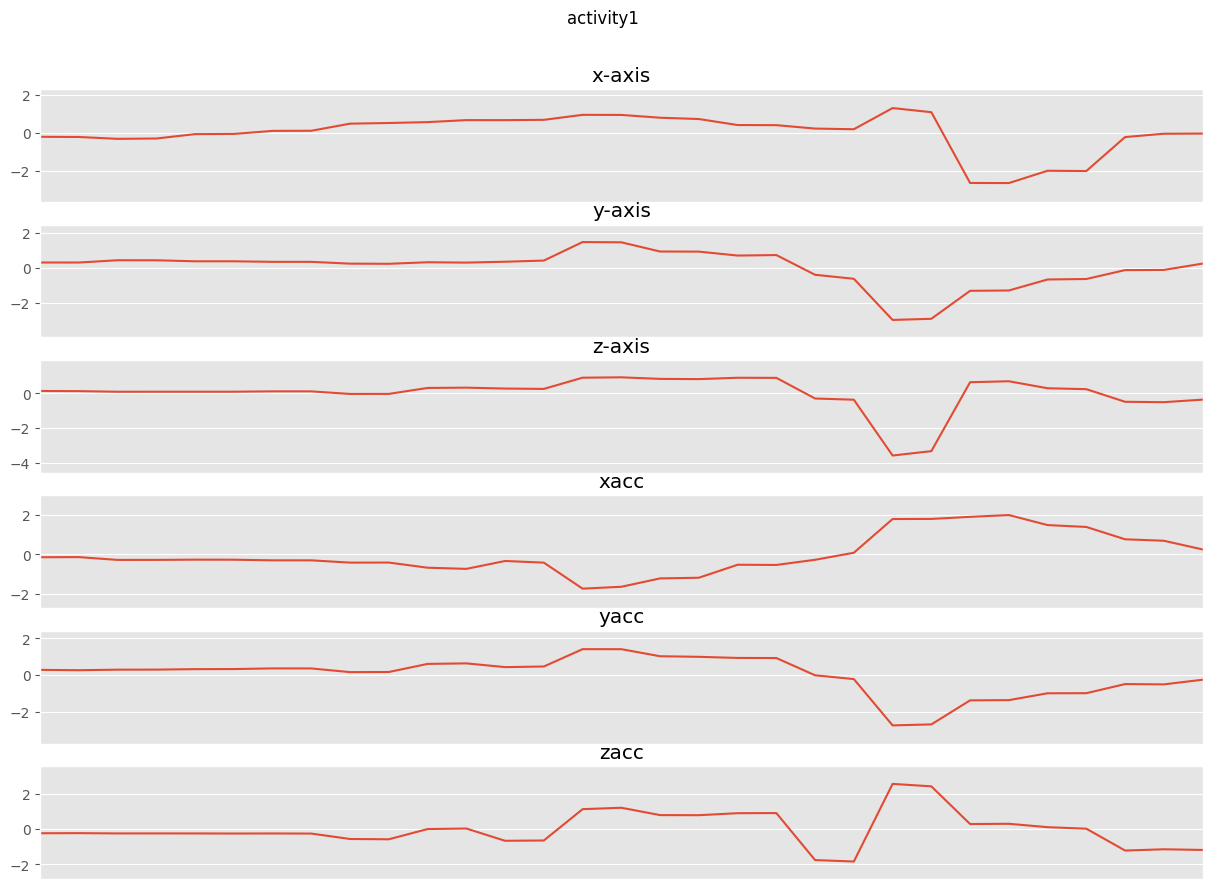

"name":{"S":"tueshit12a"}
C:\Users\hjk0811\Downloads\1\7qzsv2lx6q3uxlhsb2h4gufe2y.json.gz


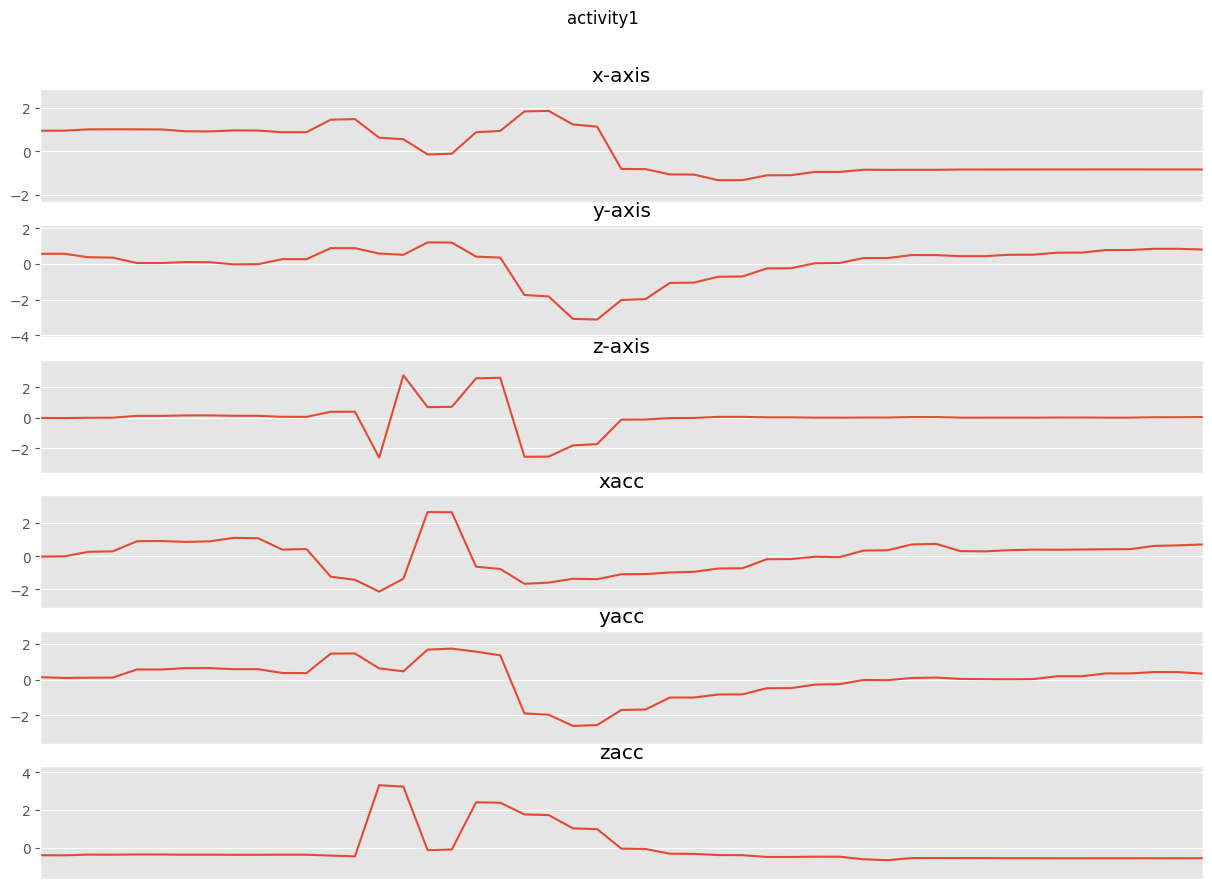

"name":{"S":"wedhit4"}
C:\Users\hjk0811\Downloads\1\aczxaaqb3iyq5ddsc5wfp5vaqe.json.gz


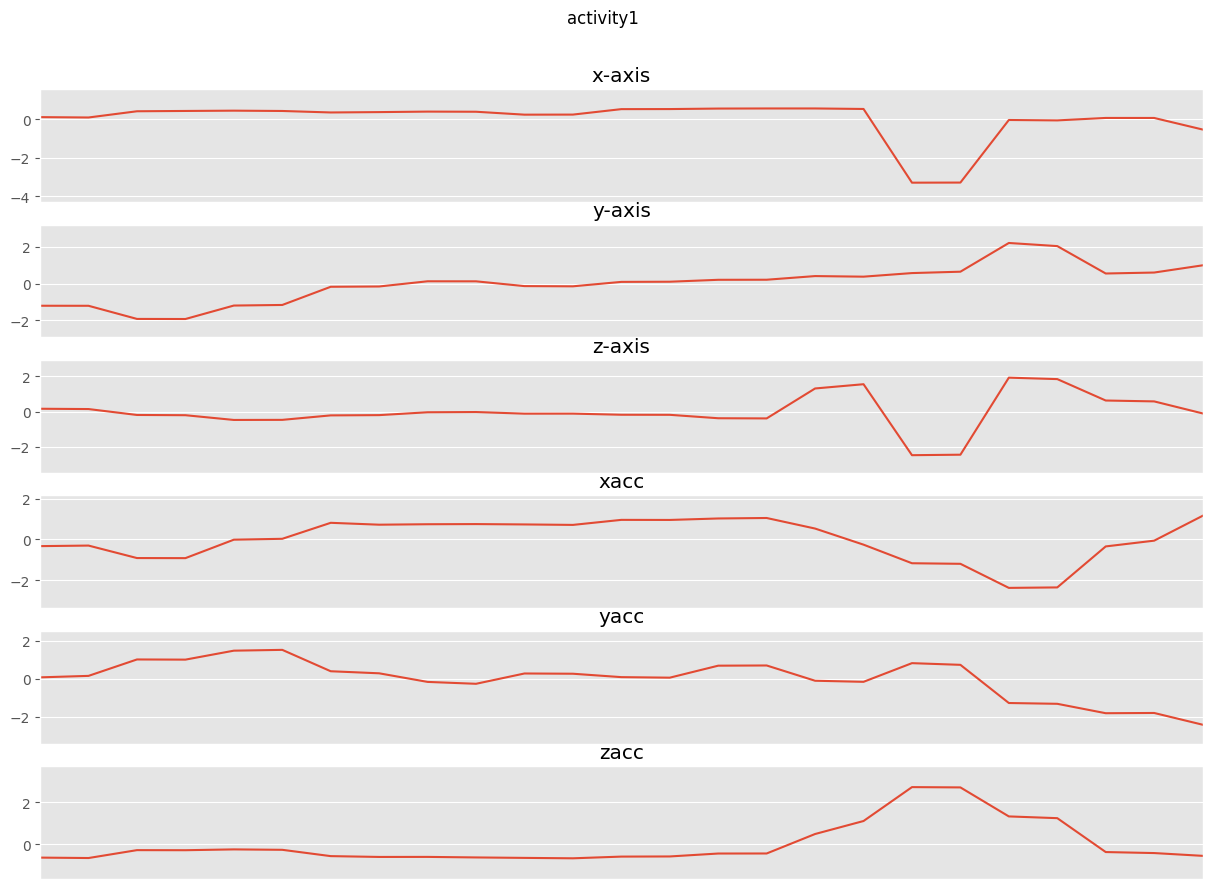

"name":{"S":"wedhit7"}
C:\Users\hjk0811\Downloads\1\bje46nuina4upewrursluao4pm.json.gz


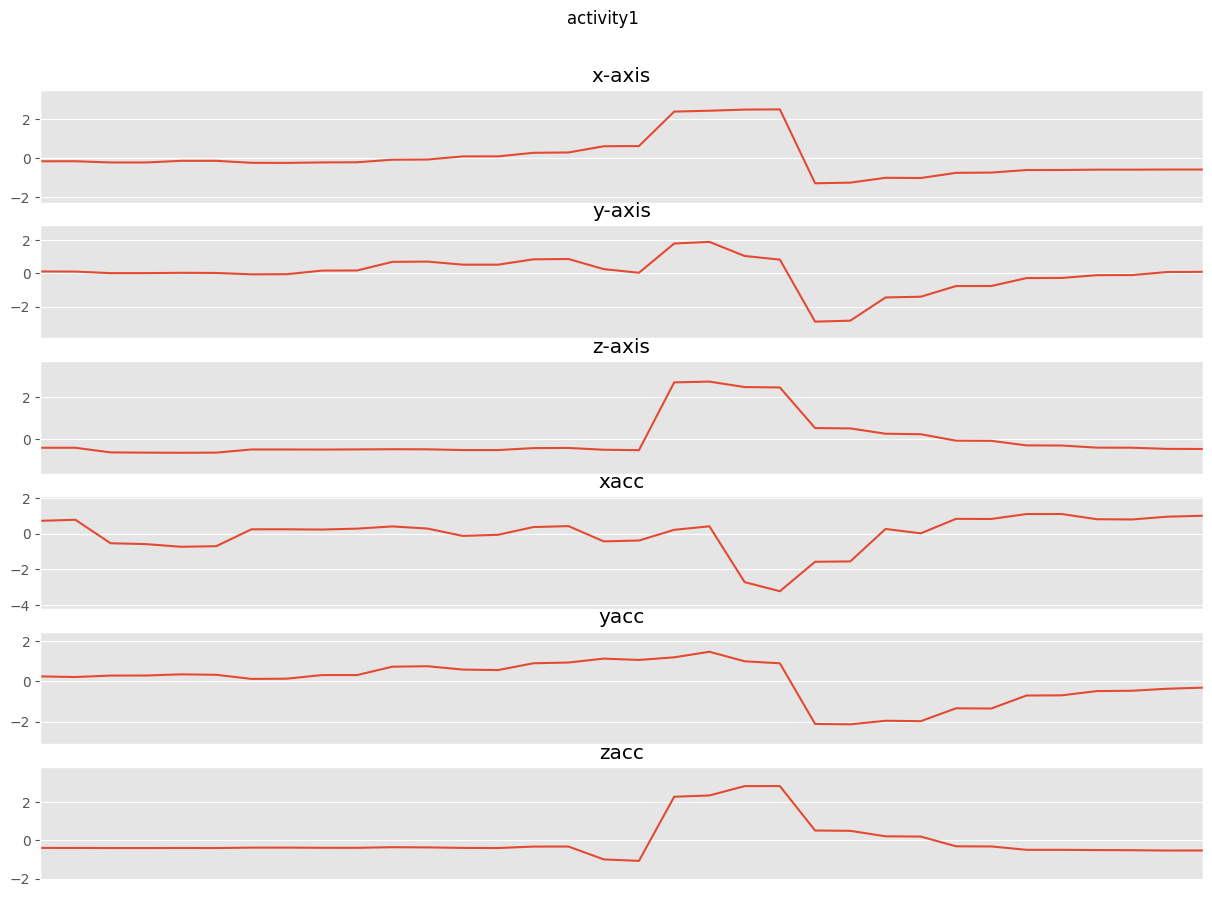

"name":{"S":"wedhit5"}
C:\Users\hjk0811\Downloads\1\km5eumqxteyljcn74w5rd34daq.json.gz


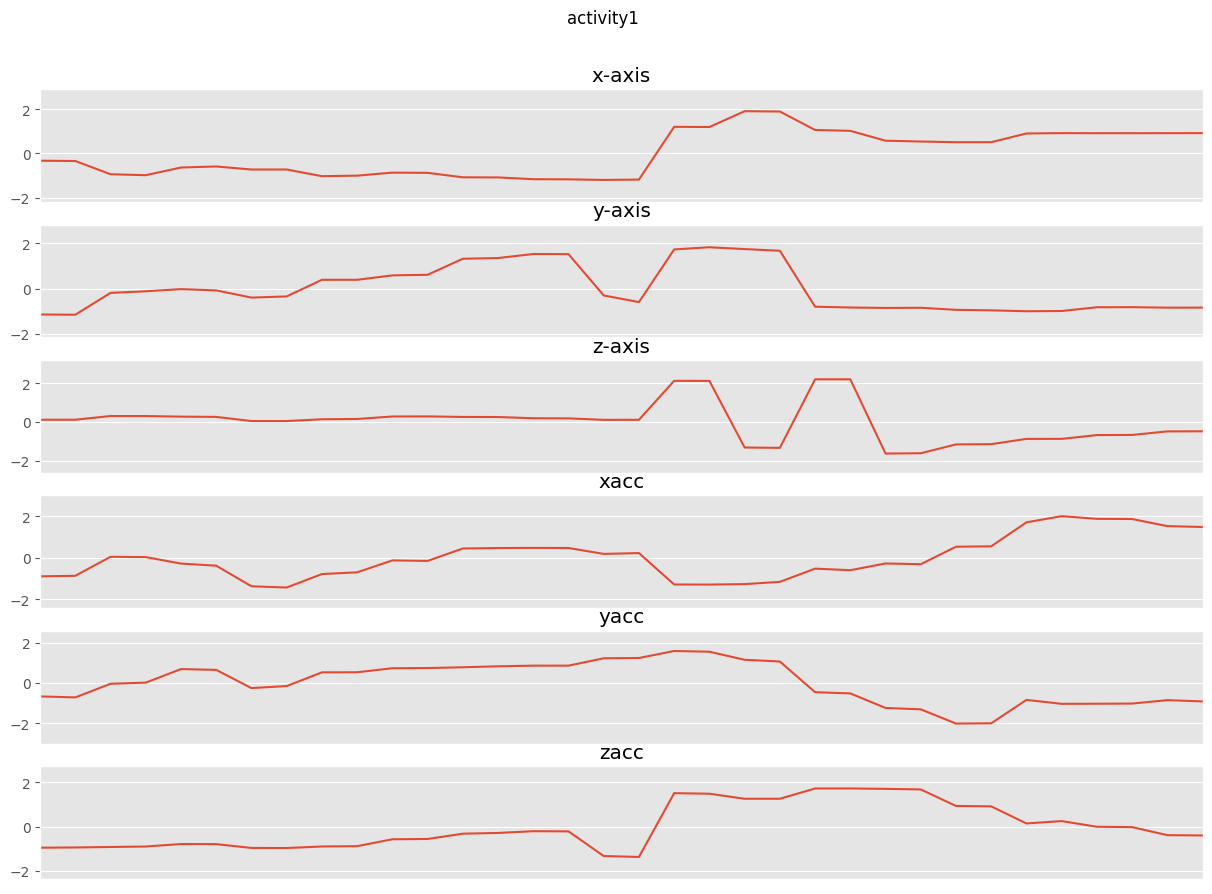

"name":{"S":"wedhit3"}
C:\Users\hjk0811\Downloads\1\qqkjxckshm3ifduo4cpuwnynmq.json.gz


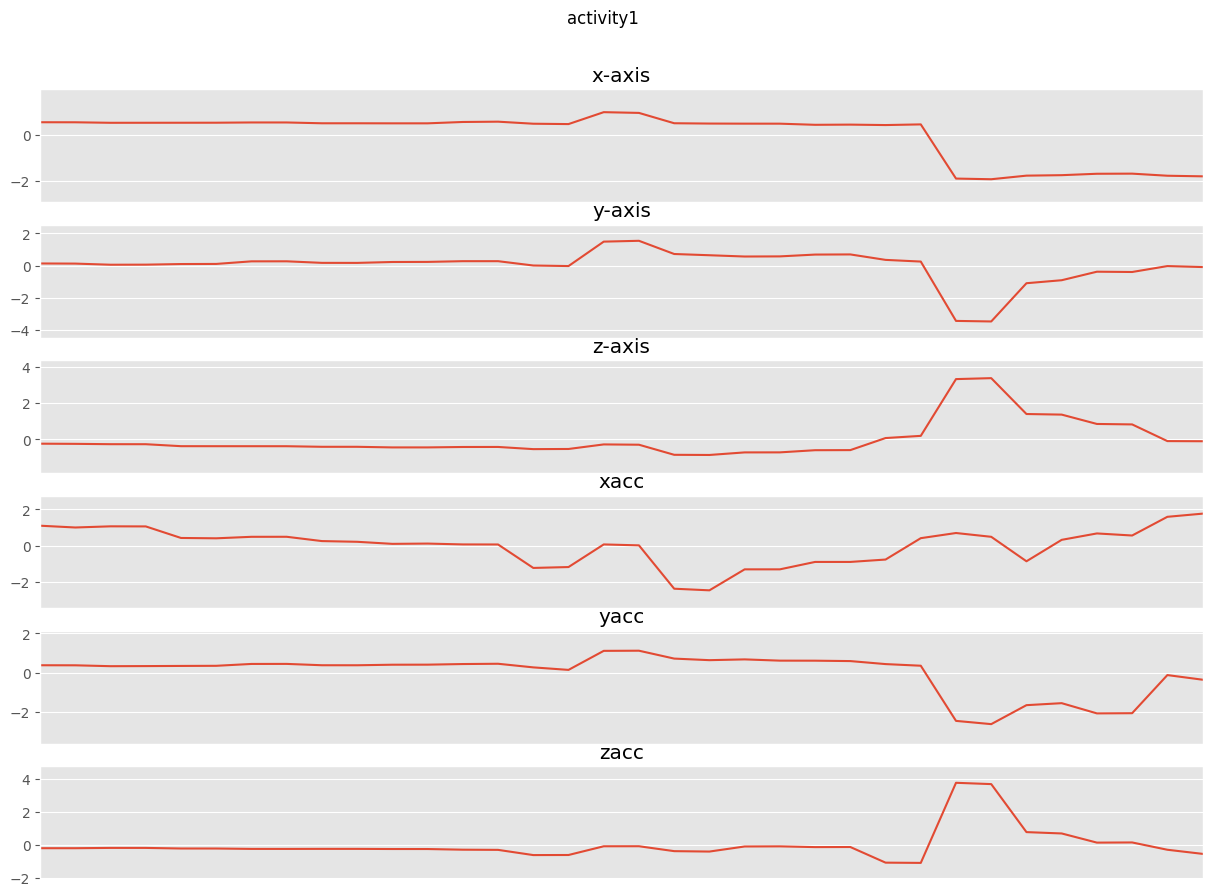

"name":{"S":"wedhit13"}
C:\Users\hjk0811\Downloads\1\tslzesanm4z3hjzw47mduhsev4.json.gz


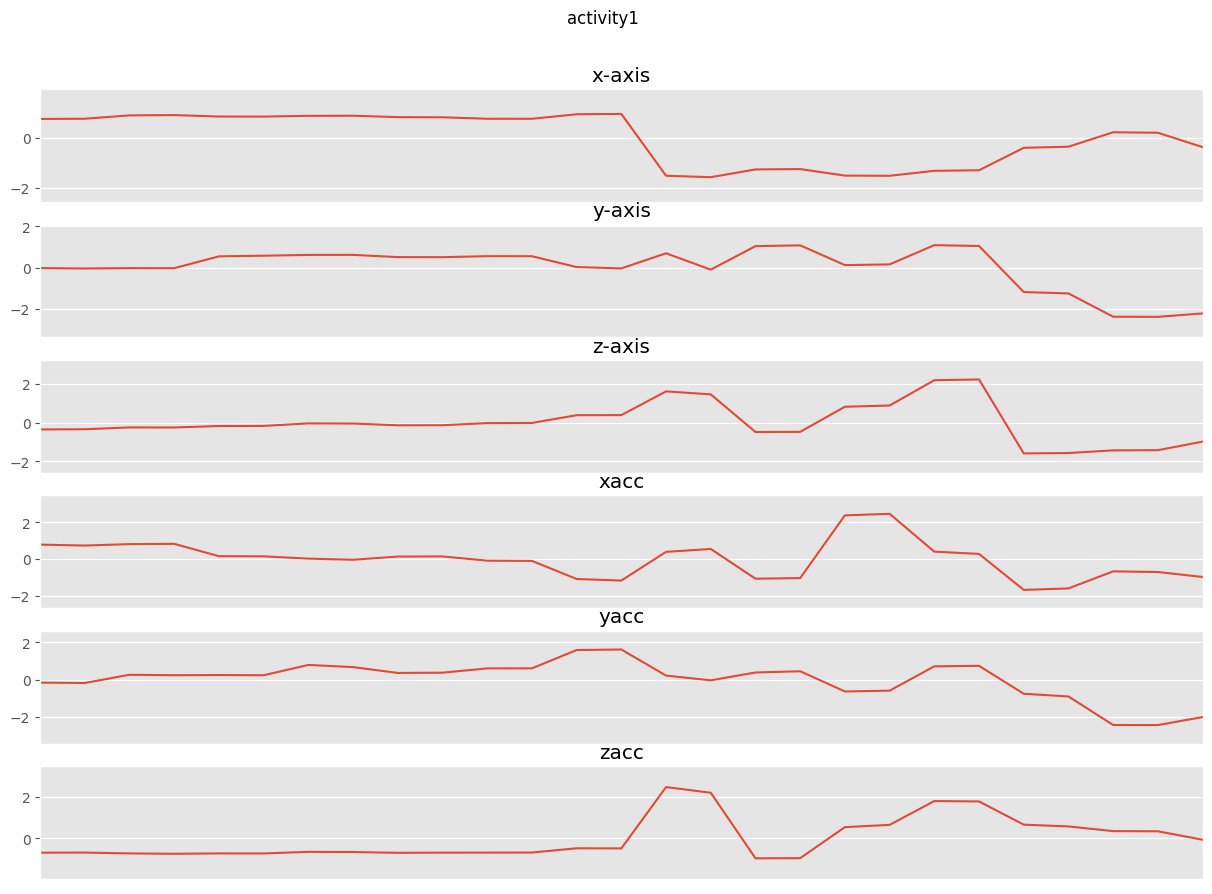

"name":{"S":"wedhit11"}


In [20]:
import glob
for name in glob.glob('C:\\Users\\hjk0811\\Downloads\\1\\*.gz'):
    print(name)
    with gzip.open(name, 'rb') as f:
        file_content = f.read()

    s=str(file_content,'utf-8')

    sss= s.split("\\")[1:-1]
    firstNum= s.split('\\')[0]
    firstNum = firstNum.split('"')[-1]
    aaa = [a.replace('t', 'p') for a in sss]
    aaa = [a.replace('n', 'p') for a in aaa]
    aaa = [a.replace('a', 'NaN') for a in aaa]
    aaa.insert(0,firstNum)
    aaa = [ele for ele in aaa if ele != 'p']
    aaa = [a.replace('p', '') for a in aaa]
    df = pd.DataFrame (aaa)
    data = np.reshape(df.to_numpy(), (-1, 7))
    df = pd.DataFrame(data)
    column_names = ['timestamp','x-axis', 'y-axis', 'z-axis','xacc','yacc','zacc']
    arr = df.to_numpy()
    dataset = pd.DataFrame(arr, columns = column_names)
    
    dataset['timestamp'] = dataset['timestamp'].astype(float)
    dataset['x-axis'] = dataset['x-axis'].astype(float)
    dataset['y-axis'] = dataset['y-axis'].astype(float)
    dataset['z-axis'] = dataset['z-axis'].astype(float)
    dataset['xacc'] = dataset['xacc'].astype(float)
    dataset['yacc'] = dataset['yacc'].astype(float)
    dataset['zacc'] = dataset['zacc'].astype(float)
    dataset['timestamp']=np.arange(dataset.shape[0])+1
    dataset.dropna(inplace=True)

    dataset['x-axis'] = feature_normalize(dataset['x-axis'])
    dataset['y-axis'] = feature_normalize(dataset['y-axis'])
    dataset['z-axis'] = feature_normalize(dataset['z-axis'])
    dataset['xacc'] = feature_normalize(dataset['xacc'])
    dataset['yacc'] = feature_normalize(dataset['yacc'])
    dataset['zacc'] = feature_normalize(dataset['zacc'])

    plot_activity(dataset)
    print(s.split(",")[-2])